### Encode Categorical Features:
- Categorical encoding is converting categorical variables (textual or nominal data) into numerical format that machine learning algorithms can use. Common methods include:

- ``Label Encoding:`` Assigning each unique category an integer label. Suitable for ordinal categories or tree-based models.

- ``One-Hot Encoding:`` Creating binary columns for each category, indicating presence/absence. Good for nominal categorical variables with no intrinsic order.

- ``Pandas`` Categorical dtype: Efficient memory representation and can be used for encoding.

In [1]:
import pandas as pd
import numpy as np

# Synthetic dataset with categorical and duplicate rows
data = {
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Houston', 'Los Angeles', 'Boston', 'Boston', 'Chicago'],
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy'],
    'Severity': [3, 2, 3, 1, 4, 2, 3, 3, 1],
    'Accidents': [100, 150, 100, 80, 90, 150, 60, 60, 80]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

Original Dataset:
          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
2     New York   Sunny         3        100
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
5  Los Angeles   Rainy         2        150
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60
8      Chicago  Cloudy         1         80


### Remove Duplicates:
Duplicates are repeated rows in the dataset that may bias analysis or models. Removing duplicates ensures data integrity and accuracy. Pandas `drop_duplicates()` method identifies and removes duplicate rows based on all or selected columns.

In [2]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df_no_duplicates)


After removing duplicates:
          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60


In [3]:
# Label Encoding with pandas category dtype
df_no_duplicates['City_Encoded'] = df_no_duplicates['City'].astype('category').cat.codes
print("\nLabel Encoded 'City' column:")
print(df_no_duplicates[['City', 'City_Encoded']])


Label Encoded 'City' column:
          City  City_Encoded
0     New York             4
1  Los Angeles             3
3      Chicago             1
4      Houston             2
6       Boston             0
7       Boston             0


C:\Users\malle\AppData\Local\Temp\ipykernel_16380\397821232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['City_Encoded'] = df_no_duplicates['City'].astype('category').cat.codes


In [4]:
# One-Hot Encoding using pandas get_dummies
df_onehot = pd.get_dummies(df_no_duplicates, columns=['Weather'])
print("\nOne-Hot Encoded 'Weather' column:")
print(df_onehot.head())


One-Hot Encoded 'Weather' column:
          City  Severity  Accidents  City_Encoded  Weather_Cloudy  \
0     New York         3        100             4           False   
1  Los Angeles         2        150             3           False   
3      Chicago         1         80             1            True   
4      Houston         4         90             2           False   
6       Boston         3         60             0           False   

   Weather_Rainy  Weather_Sunny  
0          False           True  
1           True          False  
3          False          False  
4          False           True  
6           True          False  


### Outliers Handling:
Outliers are data points that deviate significantly from the majority distribution. They may be errors or rare events.

Handling can be by:

- Removal if they are errors or noise.

- Capping or transformation to reduce skew.

- Leaving as is if meaningful for analysis.

In [5]:
# Detecting and handling outliers in 'Accidents' column using IQR method:

Q1 = df_no_duplicates['Accidents'].quantile(0.25)
Q3 = df_no_duplicates['Accidents'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_no_duplicates[(df_no_duplicates['Accidents'] < lower_bound) | (df_no_duplicates['Accidents'] > upper_bound)]
print("\nDetected outliers:")
print(outliers)

# Option 1: Remove outliers
df_no_outliers = df_no_duplicates[(df_no_duplicates['Accidents'] >= lower_bound) & (df_no_duplicates['Accidents'] <= upper_bound)]
print("\nDataset after removing outliers:")
print(df_no_outliers)

# Option 2: Cap outliers (winsorizing)
df_capped = df_no_duplicates.copy()
df_capped['Accidents'] = np.where(df_capped['Accidents'] > upper_bound, upper_bound,
                                  np.where(df_capped['Accidents'] < lower_bound, lower_bound, df_capped['Accidents']))
print("\nDataset after capping outliers:")
print(df_capped)



Detected outliers:
          City Weather  Severity  Accidents  City_Encoded
1  Los Angeles   Rainy         2        150             3

Dataset after removing outliers:
       City Weather  Severity  Accidents  City_Encoded
0  New York   Sunny         3        100             4
3   Chicago  Cloudy         1         80             1
4   Houston   Sunny         4         90             2
6    Boston   Rainy         3         60             0
7    Boston   Sunny         3         60             0

Dataset after capping outliers:
          City Weather  Severity  Accidents  City_Encoded
0     New York   Sunny         3     100.00             4
1  Los Angeles   Rainy         2     146.25             3
3      Chicago  Cloudy         1      80.00             1
4      Houston   Sunny         4      90.00             2
6       Boston   Rainy         3      60.00             0
7       Boston   Sunny         3      60.00             0


### Task:
- Visualize this outlier using boxplot.


After removing duplicates:
          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60


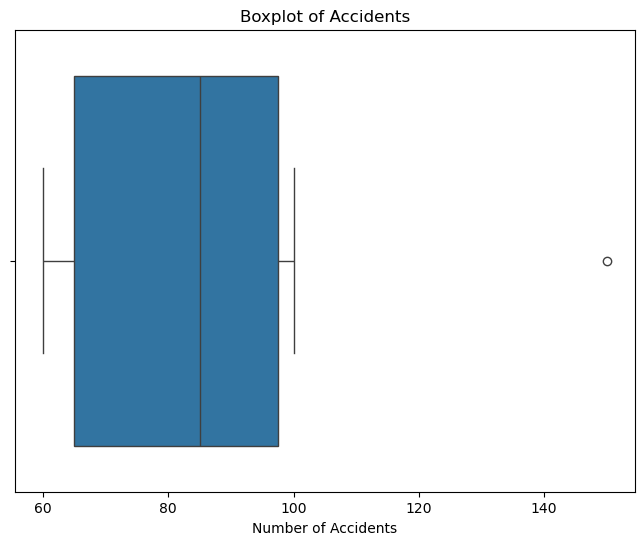

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df_no_duplicates)

# Visualize the 'Accidents' column with a boxplot to see the outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_duplicates['Accidents'])
plt.title('Boxplot of Accidents')
plt.xlabel('Number of Accidents')
plt.show()